# KNN

#### Importamos las librerías necesarias

In [22]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### Definimos funciones auxiliares

In [23]:
def trans_pca(X,n_components):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    pca = PCA(n_components)
    pca.fit(X)
    X_pca = pca.transform(X)
    return X_pca   

def validacion_modelo(y_test,y_pred):
    
    cnf_matrix = confusion_matrix(y_test, y_pred)    
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Matriz de confusión')
    tick_marks = np.arange(len(['ER+','ER-']))
    plt.xticks(tick_marks, ['ER+','ER-'], rotation=45)
    plt.yticks(tick_marks, ['ER+','ER-'])

    fmt = 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    
    VP = cnf_matrix[0][0]
    VN = cnf_matrix[1][1]
    FN = cnf_matrix[0][1]
    FP = cnf_matrix[1][0]
    
    exactitud = (VP+VN)/(VP+VN+FP+FN)
    precision = VP/(VP+FP)
    sensibilidad = VP/(VP+FN)
    puntaje = 2*precision*sensibilidad/(precision+sensibilidad)
    
    validacion = pd.DataFrame(columns=('Exactitud', 'Precisión', 'Sensibilidad', 'F1 Score'))
    validacion.loc[len(validacion)] = [exactitud,precision,sensibilidad,puntaje]

    return validacion

#### Cargamos y preparamos los datos de entrenamiento y test 

In [24]:
df_1 = pd.read_csv('D:/tfm/Medidas/Medias/300/LumA_medias.csv')
df_2 = pd.read_csv('D:/tfm/Medidas/Medias/300/Her_medias.csv')
df_3 = pd.read_csv('D:/tfm/Medidas/Medias/300/LumB_medias.csv')
df_4 = pd.read_csv('D:/tfm/Medidas/Medias/300/Bas_medias.csv')
df_1 = df_1.assign(Clase='ER+')
df_2 = df_2.assign(Clase='ER-')
df_3 = df_3.assign(Clase='ER+')
df_4 = df_4.assign(Clase='ER-')
df = df_1.append(df_2)
df = df.append(df_3)
df = df.append(df_4)

In [36]:
X = df.drop(['Clase','Image','Class'], axis=1)
y = df['Clase']

#Aplicamos análisis de componentes principales, quedándonos con 10 componentes
X = trans_pca(X,10)

#Establecemos un 80% de los datos para entrenar el modelo y un 20% para validarlo
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#### Entrenamos y validamos el modelo


,Exactitud,Precisión,Sensibilidad,F1 Score
0,0.783333,0.828571,0.805556,0.816901


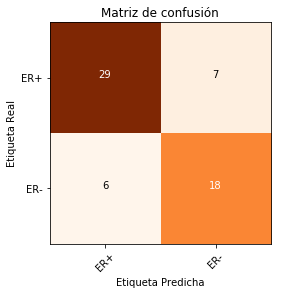

In [27]:
k = 16
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = neigh.predict(X_test)
validacion=validacion_modelo(y_test,y_pred)
validacion

#### Buscamos el valor óptimo de K

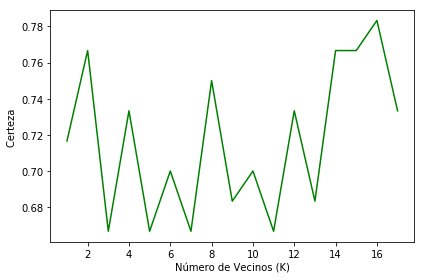

Certeza =  0.7833333333333333 para k= 16


In [35]:
Ks = 18
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()
print( "Certeza = ", mean_acc.max(), "para k=", mean_acc.argmax()+1) 